In [ ]:
import os
os.environ['http_proxy']='http://129.183.4.13:8080'
os.environ['https_proxy']='http://129.183.4.13:8080'
!pip install tensorflow==2.2
!pip install autokeras
import tensorflow as tf 
print(tf.__version__)


In [39]:


import pandas as pd
import os
full_data = pd.read_csv("data/clust_db_job_data_300.csv")

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.2
You should consider upgrading via the '/home_nfs/mimounis/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home_nfs/mimounis/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# sets features and targets as list of strings
features = full_data.columns.to_list()
targets = ['bytesRead', 'bytesWritten']
for target in targets:
    features.remove(target)

In [3]:
# let 1/3 of data unseen by model in df_test
N = full_data.shape[0]
print(f"number of points = {N}")
df = full_data.iloc[:int(N*2/3),:]
df_test = full_data.iloc[int(N*2/3):, :]
print(f"df.shape = {df.shape}")

number of points = 41842
df.shape = (27894, 72)


In [10]:
# validation and training sets
from sklearn.model_selection import train_test_split
df = df.sample(frac=1)
X = df[features].values
y = df[targets].values
X_test = df_test[features].values
y_test = df_test[targets].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import numpy as np

regressor = RandomForestRegressor(n_estimators=10)
regressor.fit(X_train, y_train)
y_hat_valid=regressor.predict(X_valid)
y_hat_test=regressor.predict(X_test)
print(f"valid RMSE = {np.sqrt(mean_squared_error(y_valid, y_hat_valid))}")
print(f"valid R2 score = {r2_score(y_valid, y_hat_valid)}")
print(f"test RMSE = {np.sqrt(mean_squared_error(y_test, y_hat_test))}")
print(f"test R2 score = {r2_score(y_test, y_hat_test)}")

valid RMSE = 1055675529.250069
valid R2 score = -11.550406825201888
test RMSE = 12466759.457592115
test R2 score = 0.9954920354193666


In [14]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import datetime
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [15]:
n_inputs = X_train.shape[1]
n_outputs = y_train.shape[1]
print(f"number of inputs in network is {n_inputs}")
print(f"number of inputs in network is {n_outputs}")
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[n_inputs]),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_outputs)])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()
EPOCHS = 100
# Tensorboard
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


number of inputs in network is 70
number of inputs in network is 2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4544      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 8,834
Trainable params: 8,834
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_split = 0.3, 
                    callbacks=[tensorboard_callback], verbose=0)

In [17]:
%tensorboard --logdir logs/fit

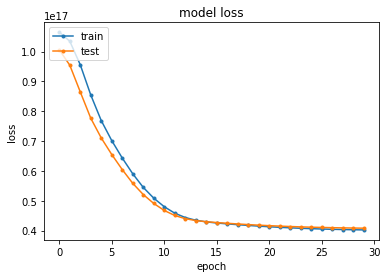

In [18]:
# summarize history for loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
import os
os.environ['http_proxy']='http://129.183.4.13:8080'
os.environ['https_proxy']='http://129.183.4.13:8080'
!pip install --upgrade pip
!pip install tensorflow==2.2
!pip install autokeras
import tensorflow as tf 
print(tf.__version__)


  Using cached pip-20.1.1-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.1
    Uninstalling pip-20.1:
      Successfully uninstalled pip-20.1
  Using cached tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl (516.2 MB)
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached tensorboard-2.2.1-py3-none-any.whl (3.0 MB)
  Using cached tensorboard_plugin_wit-1.6.0.post3-py3-none-any.whl (777 kB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-1.15.0-py2.py3-none-any.whl (89 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.0-py2.py3-none-any.whl (38 kB)
  Using cached cachetools-4.1.0-py3-none-any.whl (10 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Attempting uninstall: h5py
 

In [ ]:
!pip uninstall -y autokeras
!pip install autokeras
import autokeras as ak
data_type = len(features)*['numerical']
data_type = dict(zip(features, data_type))
regressor = ak.StructuredDataRegressor(max_trials=100, column_names=features, column_types=data_type)

In [0]:
regressor.fit(x=X_train, y=y_train)
print('Accuracy: {accuracy}'.format(accuracy=regressor.evaluate(x=X_valid, y=y_valid)))

Epoch 1/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 1.0535e-04 - val_mean_squared_error: 1.0535e-04
Epoch 2/1000
489/489 [==============================] - 1s 3ms/step - loss: 7.5106e-05 - mean_squared_error: 7.5106e-05 - val_loss: 5.6011e-05 - val_mean_squared_error: 5.6011e-05
Epoch 3/1000
489/489 [==============================] - 1s 3ms/step - loss: 4.9517e-05 - mean_squared_error: 4.9517e-05 - val_loss: 3.8763e-05 - val_mean_squared_error: 3.8763e-05
Epoch 4/1000
489/489 [==============================] - 1s 3ms/step - loss: 3.8636e-05 - mean_squared_error: 3.8636e-05 - val_loss: 2.9602e-05 - val_mean_squared_error: 2.9602e-05
Epoch 5/1000
489/489 [==============================] - 1s 3ms/step - loss: 3.3486e-05 - mean_squared_error: 3.3486e-05 - val_loss: 2.5658e-05 - val_mean_squared_error: 2.5658e-05
Epoch 6/1000
489/489 [==============================] - 1s 3ms/step - loss: 3.0549e-05 - mean_squared_error:

Epoch 1/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.1323 - mean_squared_error: 0.1323 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 2/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 5.0209e-04 - val_mean_squared_error: 5.0209e-04
Epoch 4/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 3.6822e-04 - val_mean_squared_error: 3.6822e-04
Epoch 5/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 2.8113e-04 - val_mean_squared_error: 2.8113e-04
Epoch 6/1000
489/489 [==============================] - 2s 4ms/step - loss: 8.0537e-04 - mean_squared_error: 8.0537e-04 - val_loss: 1.7718e-04 - val_mean_sq

Epoch 1/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.1054 - mean_squared_error: 0.1054 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 2/1000
489/489 [==============================] - 4s 7ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 6.1345e-04 - val_mean_squared_error: 6.1345e-04
Epoch 3/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 4.2957e-04 - val_mean_squared_error: 4.2957e-04
Epoch 4/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 3.4470e-04 - val_mean_squared_error: 3.4470e-04
Epoch 5/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 4.3247e-04 - val_mean_squared_error: 4.3247e-04
Epoch 6/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 3.8112e-04 - val_mean_sq

Epoch 1/1000
489/489 [==============================] - 3s 6ms/step - loss: 0.5643 - mean_squared_error: 0.5643 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/1000
489/489 [==============================] - 2s 5ms/step - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 3/1000
489/489 [==============================] - 2s 5ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 4/1000
489/489 [==============================] - 2s 5ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 5/1000
489/489 [==============================] - 3s 5ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 6/1000
489/489 [==============================] - 3s 6ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 7/1000
489

Epoch 1/1000
489/489 [==============================] - 3s 6ms/step - loss: 0.2455 - mean_squared_error: 0.2455 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 2/1000
489/489 [==============================] - 3s 5ms/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/1000
489/489 [==============================] - 3s 6ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 4/1000
489/489 [==============================] - 3s 5ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5/1000
489/489 [==============================] - 3s 5ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 6/1000
489/489 [==============================] - 3s 5ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7/1000
489

Epoch 1/1000
489/489 [==============================] - 2s 4ms/step - loss: 9.3056e-04 - mean_squared_error: 9.3056e-04 - val_loss: 1.1247e-04 - val_mean_squared_error: 1.1247e-04
Epoch 2/1000
489/489 [==============================] - 2s 3ms/step - loss: 2.2491e-04 - mean_squared_error: 2.2491e-04 - val_loss: 6.0243e-05 - val_mean_squared_error: 6.0243e-05
Epoch 3/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.5311e-04 - mean_squared_error: 1.5311e-04 - val_loss: 6.0012e-05 - val_mean_squared_error: 6.0012e-05
Epoch 4/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.5907e-04 - mean_squared_error: 1.5907e-04 - val_loss: 5.5568e-05 - val_mean_squared_error: 5.5568e-05
Epoch 5/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.2561e-04 - mean_squared_error: 1.2561e-04 - val_loss: 3.8020e-05 - val_mean_squared_error: 3.8020e-05
Epoch 6/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.3122e-04 - mean_square

Epoch 1/1000
489/489 [==============================] - 2s 4ms/step - loss: 8.4518e-04 - mean_squared_error: 8.4518e-04 - val_loss: 5.7799e-05 - val_mean_squared_error: 5.7799e-05
Epoch 2/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.9424e-04 - mean_squared_error: 1.9424e-04 - val_loss: 7.7615e-05 - val_mean_squared_error: 7.7615e-05
Epoch 3/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.6800e-04 - mean_squared_error: 1.6800e-04 - val_loss: 6.1484e-05 - val_mean_squared_error: 6.1484e-05
Epoch 4/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.2898e-04 - mean_squared_error: 1.2898e-04 - val_loss: 5.4579e-05 - val_mean_squared_error: 5.4579e-05
Epoch 5/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.4806e-04 - mean_squared_error: 1.4806e-04 - val_loss: 4.4278e-05 - val_mean_squared_error: 4.4278e-05
Epoch 6/1000
489/489 [==============================] - 2s 3ms/step - loss: 1.2289e-04 - mean_square

Epoch 1/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 2/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 3/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7/1000
489

Epoch 1/1000
489/489 [==============================] - 5s 9ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 6.8606e-04 - val_mean_squared_error: 6.8606e-04
Epoch 2/1000
489/489 [==============================] - 4s 9ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 7.0965e-04 - val_mean_squared_error: 7.0965e-04
Epoch 3/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 4.0641e-04 - val_mean_squared_error: 4.0641e-04
Epoch 4/1000
489/489 [==============================] - 4s 9ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 3.7926e-04 - val_mean_squared_error: 3.7926e-04
Epoch 5/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 2.2069e-04 - val_mean_squared_error: 2.2069e-04
Epoch 6/1000
489/489 [==============================] - 4s 8ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 2.9802e-04 - val

Epoch 1/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 2.5971e-04 - val_mean_squared_error: 2.5971e-04
Epoch 3/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 3.6832e-04 - val_mean_squared_error: 3.6832e-04
Epoch 4/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 3.7040e-04 - val_mean_squared_error: 3.7040e-04
Epoch 5/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 5.6193e-04 - val_mean_squared_error: 5.6193e-04
Epoch 6/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 1.8904e-04 - val_mean_sq

Epoch 1/1000
489/489 [==============================] - 2s 4ms/step - loss: 8.9783e-04 - mean_squared_error: 8.9783e-04 - val_loss: 9.5743e-05 - val_mean_squared_error: 9.5743e-05
Epoch 2/1000
489/489 [==============================] - 2s 4ms/step - loss: 3.1794e-04 - mean_squared_error: 3.1794e-04 - val_loss: 5.7648e-05 - val_mean_squared_error: 5.7648e-05
Epoch 3/1000
489/489 [==============================] - 2s 4ms/step - loss: 2.6302e-04 - mean_squared_error: 2.6302e-04 - val_loss: 7.4813e-05 - val_mean_squared_error: 7.4813e-05
Epoch 4/1000
489/489 [==============================] - 2s 4ms/step - loss: 2.1570e-04 - mean_squared_error: 2.1570e-04 - val_loss: 3.1927e-05 - val_mean_squared_error: 3.1927e-05
Epoch 5/1000
489/489 [==============================] - 2s 4ms/step - loss: 2.3506e-04 - mean_squared_error: 2.3506e-04 - val_loss: 7.9330e-05 - val_mean_squared_error: 7.9330e-05
Epoch 6/1000
489/489 [==============================] - 2s 4ms/step - loss: 2.1961e-04 - mean_square

Epoch 1/1000
489/489 [==============================] - 2s 5ms/step - loss: 0.5412 - mean_squared_error: 0.5412 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 2/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 6/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 7/1000
489

Epoch 1/1000
489/489 [==============================] - 4s 9ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 2.8494e-04 - val_mean_squared_error: 2.8494e-04
Epoch 2/1000
489/489 [==============================] - 4s 9ms/step - loss: 7.0804e-04 - mean_squared_error: 7.0804e-04 - val_loss: 6.0964e-04 - val_mean_squared_error: 6.0964e-04
Epoch 3/1000
489/489 [==============================] - 4s 8ms/step - loss: 6.6216e-04 - mean_squared_error: 6.6216e-04 - val_loss: 2.0239e-04 - val_mean_squared_error: 2.0239e-04
Epoch 4/1000
489/489 [==============================] - 4s 9ms/step - loss: 6.1471e-04 - mean_squared_error: 6.1471e-04 - val_loss: 2.0146e-04 - val_mean_squared_error: 2.0146e-04
Epoch 5/1000
489/489 [==============================] - 4s 9ms/step - loss: 5.7603e-04 - mean_squared_error: 5.7603e-04 - val_loss: 1.2720e-04 - val_mean_squared_error: 1.2720e-04
Epoch 6/1000
489/489 [==============================] - 4s 9ms/step - loss: 5.8201e-04 - mean_squared_error:

Epoch 1/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.2003 - mean_squared_error: 0.2003 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 2/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 3/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 8.2039e-04 - val_mean_squared_error: 8.2039e-04
Epoch 5/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 6.9343e-04 - val_mean_squared_error: 6.9343e-04
Epoch 6/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 5.5884e-04 - val_mean_squared_error: 5.5

Epoch 1/1000
489/489 [==============================] - 2s 5ms/step - loss: 0.5458 - mean_squared_error: 0.5458 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 2/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 3/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 4/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 5/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 6/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 7/1000
489

Epoch 1/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.1605 - mean_squared_error: 0.1605 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 2/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 5/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 9.3880e-04 - val_mean_squared_error: 9.3880e-04
Epoch 6/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 7.7476e-04 - val_mean_squared_error: 7.7476e-04


Epoch 1/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.3942 - mean_squared_error: 0.3942 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 2/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 3/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 4/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 5/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 6/1000
489/489 [==============================] - 2s 4ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 7/1000
489

Epoch 1/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 3/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7/1000
489

Epoch 1/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 9.7614e-04 - val_mean_squared_error: 9.7614e-04
Epoch 2/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 4.3952e-04 - val_mean_squared_error: 4.3952e-04
Epoch 3/1000
489/489 [==============================] - 1s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 3.0316e-04 - val_mean_squared_error: 3.0316e-04
Epoch 4/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 2.5677e-04 - val_mean_squared_error: 2.5677e-04
Epoch 5/1000
489/489 [==============================] - 1s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 2.5155e-04 - val_mean_squared_error: 2.5155e-04
Epoch 6/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 3.4705e-04 - val

Epoch 1/1000
489/489 [==============================] - 2s 3ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 3.2942e-04 - val_mean_squared_error: 3.2942e-04
Epoch 2/1000
489/489 [==============================] - 1s 3ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 1.6603e-04 - val_mean_squared_error: 1.6603e-04
Epoch 3/1000
489/489 [==============================] - 1s 3ms/step - loss: 9.5617e-04 - mean_squared_error: 9.5617e-04 - val_loss: 4.0323e-04 - val_mean_squared_error: 4.0323e-04
Epoch 4/1000
489/489 [==============================] - 1s 3ms/step - loss: 9.5123e-04 - mean_squared_error: 9.5123e-04 - val_loss: 3.7369e-04 - val_mean_squared_error: 3.7369e-04
Epoch 5/1000
489/489 [==============================] - 1s 3ms/step - loss: 8.9513e-04 - mean_squared_error: 8.9513e-04 - val_loss: 1.6250e-04 - val_mean_squared_error: 1.6250e-04
Epoch 6/1000
489/489 [==============================] - 1s 3ms/step - loss: 8.0081e-04 - mean_squared_error: 8.0081e

Epoch 1/1000
489/489 [==============================] - 4s 7ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2/1000
489/489 [==============================] - 3s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 7.5322e-04 - val_mean_squared_error: 7.5322e-04
Epoch 3/1000
489/489 [==============================] - 3s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 4/1000
489/489 [==============================] - 3s 7ms/step - loss: 9.1402e-04 - mean_squared_error: 9.1402e-04 - val_loss: 6.8145e-04 - val_mean_squared_error: 6.8145e-04
Epoch 5/1000
489/489 [==============================] - 3s 7ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 7.7771e-04 - val_mean_squared_error: 7.7771e-04
Epoch 6/1000
489/489 [==============================] - 3s 7ms/step - loss: 9.5164e-04 - mean_squared_error: 9.5164e-04 - val_loss: 6.5704e-04 - val